<a href="https://colab.research.google.com/github/HasikGiit/project_1/blob/main/%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Пример**

In [ ]:
# вначале импортируем библиотеку numpy
import numpy as np

In [ ]:
# предположим, что нам известны вес и рост трех человек
data = {
  'Иван':  [84, 180, 1],
  'Мария': [57, 165, 0],
  'Анна':  [62, 170, 0]
}

In [ ]:
# и даны следующие веса и смещение
w1, w2, b = 0.3, 0.1, -39

In [ ]:
# теперь сделаем расчет для Ивана

# вначале умножим веса на данные и прибавим смещение
r = w1 * data['Иван'][0] + w2 * data['Иван'][1] + b

# теперь пропустим результат через сигмоиду
np.round(1 / (1 + np.exp(-r)), 3)

0.985

In [ ]:
# пройдемся по ключам и значениям словаря с помощью метода .items()
for k, v in data.items():
  # вначале умножим каждую строчку данных на веса и прибавим смещение
  r1 = w1 * v[0] + w2 * v[1] + b
  # затем применим сигмоиду
  r2 = 1 / (1 + np.exp(-r1))

  # если результат больше 0,5, модель предскажет мужской пол
  if r2 > 0.5:
    print(k, '\t', np.round(r2, 3), '\t', 'male')

  # в противном случае, женский
  else:
    print(k, '\t', np.round(r2, 3), '\t', 'female')

Иван 	 0.985 	 male
Мария 	 0.004 	 female
Анна 	 0.032 	 female


Распознание цифр **Keras**

In [ ]:
# установим библиотеку tensorflow (через нее мы будем пользоваться keras) и модуль mnist
!pip install tensorflow mnist

In [ ]:
# импортируем рукописные цифры (модуль mnist)
import mnist

# и библиотеку keras
from tensorflow import keras

In [ ]:
# подгрузим данные
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# посмотрим на размерность обучающей выборки
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
# посмотрим на размерность тестовой выборки
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


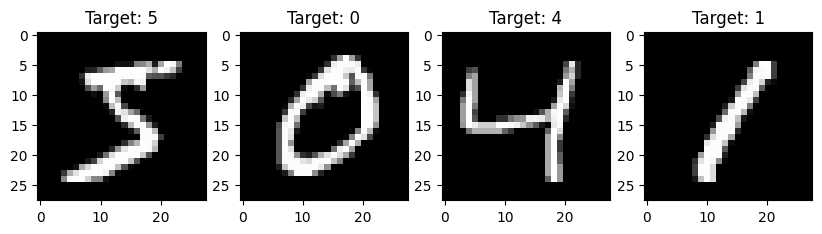

In [ ]:
import matplotlib.pyplot as plt

# создадим пространство для четырех картинок в один ряд
fig, axes = plt.subplots(1, 4, figsize = (10, 3))

# в цикле for создадим кортеж из трех объектов: id изображения (всего их будет 4), самого изображения и
# того, что на нем представлено (целевой переменной)
for ax, image, label in zip(axes, X_train, y_train):

    # на каждой итерации заполним соответствующее пространство картинкой
    ax.imshow(image, cmap = 'gray')

    # и укажем, какой цифре соответствует изображение с помощью f форматирования
    ax.set_title(f'Target: {label}')

In [ ]:
# функция np.min() возвращает минимальное значение,
# np.ptp() - разницу между максимальным и минимальным значениями (от англ. peak to peak)
X_train = 2. * (X_train - np.min(X_train)) / np.ptp(X_train) - 1
X_test = 2. * (X_test - np.min(X_test)) / np.ptp(X_test) - 1

In [ ]:
# снова воспользуемся функцией np.ptp()
np.ptp(X_train)

2.0

In [ ]:
# "вытянем" (flatten) изображения, с помощью метода .reshape()
# получится 784 столбца (28 х 28), количество строк Питон посчитает сам (-1)
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

# посмотрим на результат
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
# посмотрим на первое изображение [0], пиксели с 200 по 209
X_train[0][200:210]

array([-1.        , -1.        , -1.        , -0.61568627,  0.86666667,
        0.98431373,  0.98431373,  0.98431373,  0.98431373,  0.98431373])

In [ ]:
# импортируем класс Sequential
from keras.models import Sequential

# и создадим объект этого класса
model = Sequential()

In [ ]:
# импортируем класс Dense
from keras.layers import Dense

# и создадим первый скрытый слой (с указанием функции активации и размера входного слоя)
model.add(Dense(64, activation = 'sigmoid', input_shape = (784,)))

# затем второй скрытый слой
model.add(Dense(64, activation = 'sigmoid'))

# и наконец выходной слой
model.add(Dense(10, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# укажем настройки модели (см. страницу занятия)
model.compile(
  loss = 'categorical_crossentropy',
  optimizer = 'sgd',
  metrics = ['accuracy']
)

In [ ]:
# вначале импортируем функцию to_categorical, чтобы сделать one-hot encoding
from keras.utils import to_categorical

In [ ]:
# обучаем модель методом .fit()
model.fit(
  X_train, # указываем обучающую выборку
  to_categorical(y_train), # делаем one-hot encoding целевой переменной
  epochs = 10 # количество эпох показывает, сколько раз алгоритм пройдется по всем данным
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3311 - loss: 2.1879
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6830 - loss: 1.4049
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8055 - loss: 0.8288
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8495 - loss: 0.6043
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8732 - loss: 0.4944
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8876 - loss: 0.4269
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8981 - loss: 0.3809
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9020 - loss: 0.3521
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9050 - loss: 0.3369
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9121 - loss: 0.3135


In [ ]:
# для оценки модели воспользуемся методом .evaluate()
model.evaluate(
  X_test, # который применим к тестовым данным
  to_categorical(y_test) # не забыв закодировать целевую переменную через one-hot encoding
)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9056 - loss: 0.3340


[0.29474323987960815, 0.9187999963760376]